### <center><span style="color:lightblue">DNA FINDER</span></center>

#### <span style="color:lightblue">What is DNA?</span>
“Deoxyribonucleic Acid (DNA) is a molecule that contains the biological instructions that make each species unique. DNA, along with the instructions it contains, is passed from adult organisms to their offspring during reproduction. “ — genome.gov

A genome is a complete collection of DNA in an organism. All living species possess a genome, but they differ considerably in size. The human genome, for instance, is arranged into 23 chromosomes, which is a little bit like an encyclopedia being organized into 23 volumes. And if you counted all the characters (individual DNA “base pairs”), there would be more than 6 billion in each human genome. So it’s a huge compilation.

A human genome has about 6 billion characters or letters. If you think the genome(the complete DNA sequence) is like a book, it is a book about 6 billion letters of “A”, “C”, “G” and “T”. Now, everyone has a unique genome. Nevertheless, scientists find most parts of the human genomes are like each other.


### find mutation function

In [21]:
def findMutation(mutationString, dnaFile):
    with open(dnaFile) as f:
        if mutationString in f.read():
            print('Pateient has this mutation')  
        else:
            print('Mutation NOT present')

### reading our dna into a string variable data

In [22]:
text_file = open("todas/Ecoli_1.txt", "r")
data = text_file.read()
text_file.close()

### dividing our data into equal slices for easier distribution

In [23]:
n = 4
chunks = [data[i:i+n] for i in range(0, len(data), n)]

In [24]:
findThisPattern = "tctt"
print('Number of occurrence of '+findThisPattern+ ':', data.count(findThisPattern))

Number of occurrence of tctt: 1835


In [25]:
from pandas import read_csv
filename = "tokenizer-table-4-8.csv"

In [26]:
dataF = read_csv(filename, header=0)
shape = dataF.shape
print(shape)

(256, 27)


In [27]:
dataF = dataF.drop('Total', axis=1)
dataF = dataF.drop('Average', axis=1)

dataT = dataF.transpose()
dataT.shape

(25, 256)

### Words into array

In [28]:
words = []
for row in dataT.iloc[0]:
    words.append(row)

In [29]:
dataT.drop(dataT.index[0], axis=0, inplace=True)

In [30]:
vectors = dataT.to_numpy()

In [31]:
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy

In [33]:
import pandas as pd

leaves = list(dataT.index)

MIN_ECOLI = 1
MAX_ECOLI = 8

MIN_PYROCOCCUSFURIOSUS  = 9
MAX_PYROCOCCUSFURIOSUS  = 16

MIN_SALMONELLA = 17
MAX_SALMONELLA = 24

Ecoli = dataT.iloc[MIN_ECOLI:MAX_ECOLI+1,]
Ecoli_leaves = leaves[MIN_ECOLI:MAX_ECOLI+1]

Salmonella = dataT.iloc[MIN_SALMONELLA:MAX_SALMONELLA+1,]
Salmonella_leaves = leaves[MIN_SALMONELLA:MAX_SALMONELLA+1]

PyrococcusFuriosus = dataT.iloc[MIN_PYROCOCCUSFURIOSUS:MAX_PYROCOCCUSFURIOSUS+1]
PyrococcusFuriosus_leaves = leaves[MIN_PYROCOCCUSFURIOSUS:MAX_PYROCOCCUSFURIOSUS+1]


In [34]:
frames = [Ecoli, PyrococcusFuriosus, Salmonella]
vectors = pd.concat(frames)

theLeaves = Ecoli_leaves + PyrococcusFuriosus_leaves + Salmonella_leaves

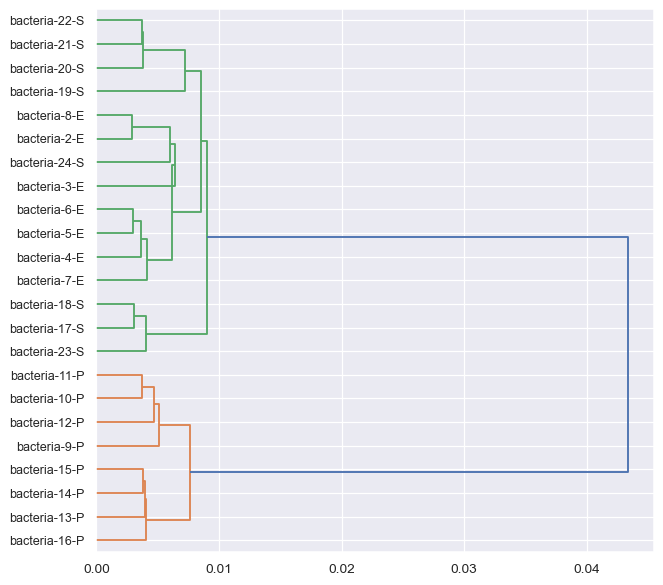

In [35]:
plt.figure(figsize=(8, 8), dpi=90)
Z = hierarchy.linkage(vectors, method='centroid', metric='euclidean' )
d = hierarchy.dendrogram( Z, orientation="right", labels=theLeaves)